# Data Frame

In [1]:
import pandas as pd
import os

scrip_dir = os.path.dirname(os.path.realpath('__file__'))
rel_path = "BanglaComments.csv"
abs_file_path = os.path.join(scrip_dir, rel_path)

df = pd.read_csv(abs_file_path) 

#df.columns = ['class','Sentence']


In [2]:
df['label'] = pd.factorize(df.Class)[0]
df.head()

Class                                          Sentences  label
0   ntr  рж╢рзЗржЦ рж╣рж╛рж╕рж┐ржирж╛рж░ ржЖрж╢ржХрж╛рж░рж╛ ржкрзЗрзЯрзЗ рж╕рж╛ржХрж┐ржм ржПржЦржи ржмрж┐рж╢рж╛рж▓ ржХрзНрж╖ржорждрж╛...      0
1   pos                                          рж╢рзБржн ржХрж╛ржоржирж╛      1
2   neg  ржПржЗрж╕ржм ржорж╛ржирзБрж╖ ржХржЦржирзЛ ржирж┐ржЬрзЗржХрзЗ ржкрж░рж┐ржмрж░рзНрждржирзЗ ржирж┐рзЯрзЗ ржЖрж╕рждрзЗ ржкрж╛рж░...      2
3   ntr      ржнрж╛рждрж┐ржЬрж╛ ржЫрзБржЯрж┐ ржирж┐рж▓рзЗ ржмрж╛ржЗрж░рзЗ ржЖржЧрзЗ ржерзЗржХрзЗ ржЦржмрж░ ржмрзЗрж░ рж╣рзЯржирж╛ред      0
4   ntr  ржЖрж░ рж╕рж╛ржХрж┐ржм ржЫрзБржЯрж┐ ржЪрж╛ржУрзЯрж╛рж░ ржЖржЧрзЗржЗ ржЖржХрж░рж╛ржо рж╕рж╛ржм ржмрзНрж░рж┐ржлрж┐ржВ ржХрж░...      0

In [3]:
df.describe()

label
count  3006.000000
mean      1.020293
std       0.834721
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       2.000000

# Lable Data Count Chart

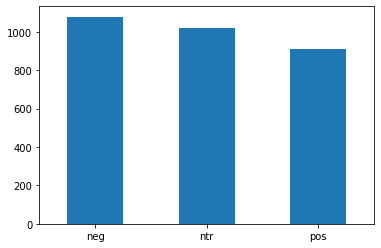

In [4]:
df['Class'].value_counts().plot(kind="bar", rot=0)

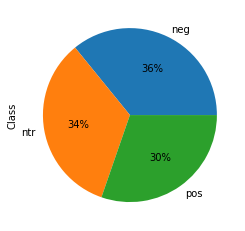

In [5]:
df['Class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

# Data Cleaning

In [6]:
import re

def clean_sentence(sent):
    sent = str(sent)
    sent = re.sub('[?.`*^()!┬░┬в▄М═░╠░▀Т╫а~├Ч╥а▀Ш:╥░▀С├Н|ред;!,&%\'@#$><A-Za-z0+-9=./''""_рзж-рзп]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'▀С═░▀С╠░▀Т╫а', '', sent)
    sent = re.sub(r'▀О╔░▀О╔░▀О╔Н', '', sent)
    
    sent = sent.strip()
    return sent

In [7]:
df.loc[13,'Sentences']

'ржЕржирждрж┐ ржмрж┐рж▓ржорзНржмрзЗ ржмрж╛ржВрж▓рж╛ржжрзЗрж╢ ржХрзНрж░рж┐ржХрзЗржЯ ржерзЗржХрзЗ рж╕рж╛ржХрж┐ржмржХрзЗ ржмрж╣рж┐рж╖рзНржХрж╛рж░ ржХрж░рж╛ рж╣рзЛржХредржмрзЛрж░рзНржбрзЗрж░ ржЖрж╢ржХрж╛рж░рж╛рзЯ рж╕рж╛ржХрж┐ржм ржПржХрзЗрж░ ржкрж░ ржПржХ ржмрж┐рж░рзНрждржХрзЗрж░ ржЬржирзНржо ржжрж┐рзЯрзЗ ржЪрж▓рзЗржЫрзЗредрждрж╛ржЗ ржПржЗ ржмрж┐рж░рзНрждржХрж┐ржд рж╕рж╛ржХрж┐ржмрзЗрж░ рж╢рж╛рж╕рзНрждрж┐ рж╣ржУрзЯрж╛ ржПржЦржи ржЬрж░рзБрж░рж┐ред'

In [8]:
for i, sent  in enumerate(df['Sentences'].tolist()):
    df.loc[i,'clean_sentences'] = clean_sentence(sent)

In [9]:
test = df.loc[13,'clean_sentences']
test

'ржЕржирждрж┐ ржмрж┐рж▓ржорзНржмрзЗ ржмрж╛ржВрж▓рж╛ржжрзЗрж╢ ржХрзНрж░рж┐ржХрзЗржЯ ржерзЗржХрзЗ рж╕рж╛ржХрж┐ржмржХрзЗ ржмрж╣рж┐рж╖рзНржХрж╛рж░ ржХрж░рж╛ рж╣рзЛржХржмрзЛрж░рзНржбрзЗрж░ ржЖрж╢ржХрж╛рж░рж╛рзЯ рж╕рж╛ржХрж┐ржм ржПржХрзЗрж░ ржкрж░ ржПржХ ржмрж┐рж░рзНрждржХрзЗрж░ ржЬржирзНржо ржжрж┐рзЯрзЗ ржЪрж▓рзЗржЫрзЗрждрж╛ржЗ ржПржЗ ржмрж┐рж░рзНрждржХрж┐ржд рж╕рж╛ржХрж┐ржмрзЗрж░ рж╢рж╛рж╕рзНрждрж┐ рж╣ржУрзЯрж╛ ржПржЦржи ржЬрж░рзБрж░рж┐'

# Stopword Removing

In [10]:
stp_wrd_lines = []
with open('stop_words.txt', encoding="utf8") as f:
    stp_wrd_lines = f.readlines()
    
stop_words = set()
for word in stp_wrd_lines:
    if word.strip()!='ржирж╛':
        stop_words.add(word.strip())
print(len(stop_words))    
stop_words

397


{'ржЕрждржПржм',
 'ржЕржержЪ',
 'ржЕржержмрж╛',
 'ржЕржирзБржпрж╛ржпрж╝рзА',
 'ржЕржирзЗржХ',
 'ржЕржирзЗржХрзЗ',
 'ржЕржирзЗржХрзЗржЗ',
 'ржЕржирзНрждржд',
 'ржЕржирзНржп',
 'ржЕржмржзрж┐',
 'ржЕржмрж╢рзНржп',
 'ржЕрж░рзНржерж╛ржд',
 'ржЖржЗ',
 'ржЖржЧрж╛ржорзА',
 'ржЖржЧрзЗ',
 'ржЖржЧрзЗржЗ',
 'ржЖржЫрзЗ',
 'ржЖржЬ',
 'ржЖржжрзНржпржнрж╛ржЧрзЗ',
 'ржЖржкржирж╛рж░',
 'ржЖржкржирж┐',
 'ржЖржмрж╛рж░',
 'ржЖржорж░рж╛',
 'ржЖржорж╛ржХрзЗ',
 'ржЖржорж╛ржжрзЗрж░',
 'ржЖржорж╛рж░',
 'ржЖржорж┐',
 'ржЖрж░',
 'ржЖрж░ржУ',
 'ржЗ',
 'ржЗрждрзНржпрж╛ржжрж┐',
 'ржЗрж╣рж╛',
 'ржЙржЪрж┐ржд',
 'ржЙрждрзНрждрж░',
 'ржЙржирж┐',
 'ржЙржкрж░',
 'ржЙржкрж░рзЗ',
 'ржП',
 'ржПржБржжрзЗрж░',
 'ржПржБрж░рж╛',
 'ржПржЗ',
 'ржПржХржЗ',
 'ржПржХржЯрж┐',
 'ржПржХржмрж╛рж░',
 'ржПржХрзЗ',
 'ржПржХрзН',
 'ржПржЦржи',
 'ржПржЦржиржУ',
 'ржПржЦрж╛ржирзЗ',
 'ржПржЦрж╛ржирзЗржЗ',
 'ржПржЯрж╛',
 'ржПржЯрж╛ржЗ',
 'ржПржЯрж┐',
 'ржПржд',
 'ржПрждржЯрж╛ржЗ',
 'ржПрждрзЗ',
 'ржПржжрзЗрж░',
 'ржПржм',
 'ржПржмржВ',
 'ржПржмр

In [11]:
#!pip install sbnltk
from sbnltk.Stemmer import stemmerOP
st=stemmerOP()

def tokenized_data(sent):
    sent = st.stemSent(sent)
    tokenized_text = sent.split()
    return tokenized_text

tokenized_data(df.loc[13,'clean_sentences'])

['ржЕржиржд',
 'ржмрж┐рж▓ржорзНржм',
 'ржмрж╛ржВрж▓рж╛ржжрзЗрж╢',
 'ржХрзНрж░рж┐ржХрзЗржЯ',
 'рже',
 'рж╕рж╛ржХрж┐ржм',
 'ржмрж╣рж┐рж╖рзНржХрж╛рж░',
 'ржХ',
 'рж╣рзЛржХржмрзЛрж░рзНржбрзЗрж░',
 'ржЖрж╢ржХрж╛рж░рж╛рзЯ',
 'рж╕рж╛ржХрж┐ржм',
 'ржПржХ',
 'ржкрж░',
 'ржПржХ',
 'ржмрж┐рж░рзНрждржХрзЗрж░',
 'ржЬржирзНржо',
 'ржжрж┐',
 'ржЪрж▓рзЗржЫрзЗрждрж╛ржЗ',
 'ржПржЗ',
 'ржмрж┐рж░рзНрждржХрж┐ржд',
 'рж╕рж╛ржХрж┐ржм',
 'рж╢рж╛рж╕рзНржд',
 'рж╣ржУрзЯрж╛',
 'ржПржЦржи',
 'ржЬрж░рзБрж░']

In [12]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [13]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : ржЕржирждрж┐ ржмрж┐рж▓ржорзНржмрзЗ ржмрж╛ржВрж▓рж╛ржжрзЗрж╢ ржХрзНрж░рж┐ржХрзЗржЯ ржерзЗржХрзЗ рж╕рж╛ржХрж┐ржмржХрзЗ ржмрж╣рж┐рж╖рзНржХрж╛рж░ ржХрж░рж╛ рж╣рзЛржХржмрзЛрж░рзНржбрзЗрж░ ржЖрж╢ржХрж╛рж░рж╛рзЯ рж╕рж╛ржХрж┐ржм ржПржХрзЗрж░ ржкрж░ ржПржХ ржмрж┐рж░рзНрждржХрзЗрж░ ржЬржирзНржо ржжрж┐рзЯрзЗ ржЪрж▓рзЗржЫрзЗрждрж╛ржЗ ржПржЗ ржмрж┐рж░рзНрждржХрж┐ржд рж╕рж╛ржХрж┐ржмрзЗрж░ рж╢рж╛рж╕рзНрждрж┐ рж╣ржУрзЯрж╛ ржПржЦржи ржЬрж░рзБрж░рж┐
after : ржЕржиржд ржмрж┐рж▓ржорзНржм ржмрж╛ржВрж▓рж╛ржжрзЗрж╢ ржХрзНрж░рж┐ржХрзЗржЯ рже рж╕рж╛ржХрж┐ржм ржмрж╣рж┐рж╖рзНржХрж╛рж░ ржХ рж╣рзЛржХржмрзЛрж░рзНржбрзЗрж░ ржЖрж╢ржХрж╛рж░рж╛рзЯ рж╕рж╛ржХрж┐ржм ржПржХ ржПржХ ржмрж┐рж░рзНрждржХрзЗрж░ ржЬржирзНржо ржжрж┐ ржЪрж▓рзЗржЫрзЗрждрж╛ржЗ ржмрж┐рж░рзНрждржХрж┐ржд рж╕рж╛ржХрж┐ржм рж╢рж╛рж╕рзНржд рж╣ржУрзЯрж╛ ржЬрж░рзБрж░


In [14]:
df['data_clean'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentences'].tolist()]

In [15]:
bang_alphabets = ['ржБ', 'ржВ', 'ржГ', 'ржЕ', 'ржЖ', 'ржЗ', 'ржИ', 'ржЙ', 'ржК', 'ржЛ', 'ржМ', 'ржП', 'ржР', 'ржУ', 'ржФ', 'ржХ', 'ржЦ', 'ржЧ', 'ржШ', 'ржЩ', 'ржЪ', 'ржЫ', 'ржЬ', 'ржЭ', 'ржЮ', 'ржЯ', 'ржа', 'ржб', 'ржв', 'ржг', 'ржд', 'рже', 'ржж', 'ржз', 'ржи', 'ржк', 'ржл', 'ржм', 'ржн', 'ржо', 'ржп', 'рж░', 'рж▓', 'рж╢', 'рж╖', 'рж╕', 'рж╣', 'рж╝', 'рж╜', 'рж╛', 'рж┐', 'рзА', 'рзБ', 'рзВ', 
                  'рзГ', 'рзД', 'рзЗ', 'рзИ', 'рзЛ', 'рзМ', 'рзН', 'рзО', 'рзЧ', 'рзЬ', 'рзЭ', 'рзЯ', 'рза', 'рзб', 'рзв', 'рзг', 'рзж', 'рзз', 'рзи', 'рзй', 'рзк', 'рзл', 'рзм', 'рзн', 'рзо', 'рзп', 'рз░', 'рз▒', 'рз▓', 'рз│', 'рз┤', 'рз╡', 'рз╢', 'рз╖', 'рз╕', 'рз╣', 'рз║', 'рз╗', '\u09fc', '\u09fd', '\u09fe']

def bangla_single_alphabets_remove(sent):
    tokenized_text = sent.split()
    tokenized_text = [w for w in tokenized_text if not w in bang_alphabets]
    text = ' '.join(tokenized_text)
    return text

In [16]:
df['clean_data'] = [bangla_single_alphabets_remove(sent) for sent in df['data_clean'].tolist()]

In [17]:
print('before :', r_word)
print('before :', bangla_single_alphabets_remove(r_word))

before : ржЕржиржд ржмрж┐рж▓ржорзНржм ржмрж╛ржВрж▓рж╛ржжрзЗрж╢ ржХрзНрж░рж┐ржХрзЗржЯ рже рж╕рж╛ржХрж┐ржм ржмрж╣рж┐рж╖рзНржХрж╛рж░ ржХ рж╣рзЛржХржмрзЛрж░рзНржбрзЗрж░ ржЖрж╢ржХрж╛рж░рж╛рзЯ рж╕рж╛ржХрж┐ржм ржПржХ ржПржХ ржмрж┐рж░рзНрждржХрзЗрж░ ржЬржирзНржо ржжрж┐ ржЪрж▓рзЗржЫрзЗрждрж╛ржЗ ржмрж┐рж░рзНрждржХрж┐ржд рж╕рж╛ржХрж┐ржм рж╢рж╛рж╕рзНржд рж╣ржУрзЯрж╛ ржЬрж░рзБрж░
before : ржЕржиржд ржмрж┐рж▓ржорзНржм ржмрж╛ржВрж▓рж╛ржжрзЗрж╢ ржХрзНрж░рж┐ржХрзЗржЯ рж╕рж╛ржХрж┐ржм ржмрж╣рж┐рж╖рзНржХрж╛рж░ рж╣рзЛржХржмрзЛрж░рзНржбрзЗрж░ ржЖрж╢ржХрж╛рж░рж╛рзЯ рж╕рж╛ржХрж┐ржм ржПржХ ржПржХ ржмрж┐рж░рзНрждржХрзЗрж░ ржЬржирзНржо ржжрж┐ ржЪрж▓рзЗржЫрзЗрждрж╛ржЗ ржмрж┐рж░рзНрждржХрж┐ржд рж╕рж╛ржХрж┐ржм рж╢рж╛рж╕рзНржд рж╣ржУрзЯрж╛ ржЬрж░рзБрж░


In [18]:
cleaned_text = df['clean_data']
cleaned_text

0       рж╢рзЗржЦ рж╣рж╛рж╕рж┐ржи ржЖрж╢ржХрж╛ ржкрж╛ рж╕рж╛ржХрж┐ржм ржмрж┐рж╢рж╛рж▓ ржХрзНрж╖ржорждрж╛ржзрж░ржПржЦржи ржЪрзЛржЦ ...
1                                               рж╢рзБржн ржХрж╛ржоржирж╛
2              ржПржЗрж╕ржм ржорж╛ржирзБрж╖ ржХржЦржирзЛ ржирж┐ржЬ ржкрж░рж┐ржмрж░рзНрждржи ржирж┐ ржЖрж╕ ржкрж╛рж░ржмрзЗржирж╛
3                     ржнрж╛рждрж┐ржЬрж╛ ржЫрзБржЯрж┐ ржирж┐рж▓ ржмрж╛ржЗрж░ ржЖржЧ ржЦржм ржмрзЗрж░ рж╣рзЯржирж╛
4       рж╕рж╛ржХрж┐ржм ржЫрзБржЯрж┐ ржЪрж╛ржУрзЯрж╛рж░ ржЖржЧ ржЖржХрж░рж╛ржо рж╕рж╛ржм ржмрзНрж░рж┐ржлрж┐ржВ ржХрж░ рж╕рж╛ржВржм...
                              ...                        
3001    рж╕рж░ржХрж╛рж░рзА ржЪрж╛ржХрж░рзА ржУрзЯрж╛рж▓рж╛рж░рж╛ рж▓ржХржбрж╛ржЙржи ржкрж╛ржЗрж▓ ржарзЗржХрж╛рзЯ ржШрж░ ржмрж╕ ржм...
3002                                     ржорж╛ржирзБрж╖ ржирж╛ ржЦрж╛ ржорж░ржмрзЗ
3003     ржоржи ржХрж╛рж░ржи ржкрж░рж┐рж╖рждрж┐ржерж┐ ржЦрж╛рж░рж╛ржк рж╣рж▓рзЗрж╕рж╛ржорж╛рж▓ ржжрзЗржмрж╛рж░ ржХрзНрж╖ржорждрж╛ ржЖржорж╛


In [19]:
refined_sentence = " ".join(cleaned_text)

In [20]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf

--2021-06-12 12:30:15--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: тАШkalpurush.ttf.2тАЩ

kalpurush.ttf.2     100%[===================>] 307.22K   450KB/s    in 0.7s    

2021-06-12 12:30:17 (450 KB/s) - тАШkalpurush.ttf.2тАЩ saved [314592/314592]



/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


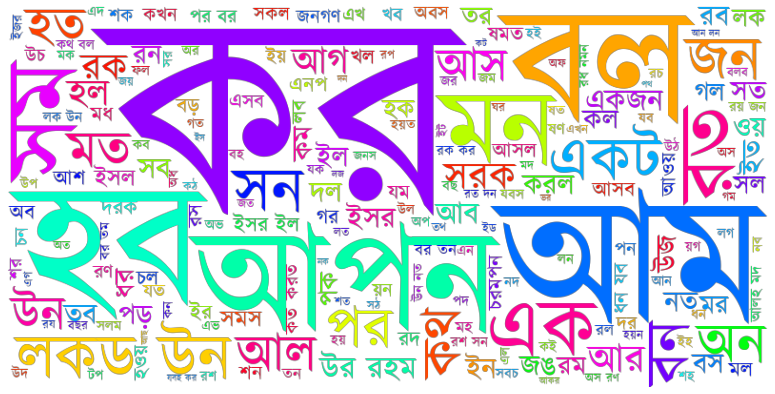

In [21]:
#!pip install wordcloud
#!pip install bnlp_toolkit


import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bnlp.corpus import stopwords

wc = WordCloud(width=800, height=400, mode="RGBA",background_color=None, colormap="hsv",
               font_path="kalpurush.ttf").generate(refined_sentence)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

result = wc.to_file("Bengali_word_cloud.png")


# Preprocessing Data For model

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def ngram(gram_range1, gram_range2):
  
  word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(gram_range1, gram_range2), min_df=1, lowercase=False,
                                            token_pattern=u'[\S]+', tokenizer=None)


  word_vectorizerGram.fit_transform(df['clean_data'])
  stpGram = word_vectorizerGram.get_feature_names()
  return stpGram, word_vectorizerGram


In [23]:
import numpy as np
def sentence_to_vector_transform(line, gram_range1, gram_range2, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(gram_range1, gram_range2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent

In [24]:
def sentence_to_vector(data, stpGram,gram_range1,gram_range2):
    dataForSVM = []

    for idx, sent in enumerate(data):
      
        sent = sentence_to_vector_transform(sent, gram_range1, gram_range2, stpGram)
        #print(sent)
        try:
            dataForSVM.append(sent)
        except:
            continue 
    return dataForSVM

Bigram

In [25]:
stpGram_bi, word_vectorizerGram_bi = ngram(1,2)
print(len(stpGram_bi))
print(word_vectorizerGram_bi.vocabulary_)

25240
{'рж╢рзЗржЦ': 21849, 'рж╣рж╛рж╕рж┐ржи': 24789, 'ржЖрж╢ржХрж╛': 2010, 'ржкрж╛': 13341, 'рж╕рж╛ржХрж┐ржм': 23005, 'ржмрж┐рж╢рж╛рж▓': 16795, 'ржХрзНрж╖ржорждрж╛ржзрж░ржПржЦржи': 6025, 'ржЪрзЛржЦ': 7709, 'ржмрж┐рж╕рж┐ржмрж┐': 16916, 'ржмрж╕': 15587, 'ржЪрзЗрзЯ': 7687, 'рж╢рзЗржЦ рж╣рж╛рж╕рж┐ржи': 21857, 'рж╣рж╛рж╕рж┐ржи ржЖрж╢ржХрж╛': 24790, 'ржЖрж╢ржХрж╛ ржкрж╛': 2011, 'ржкрж╛ рж╕рж╛ржХрж┐ржм': 13361, 'рж╕рж╛ржХрж┐ржм ржмрж┐рж╢рж╛рж▓': 23041, 'ржмрж┐рж╢рж╛рж▓ ржХрзНрж╖ржорждрж╛ржзрж░ржПржЦржи': 16796, 'ржХрзНрж╖ржорждрж╛ржзрж░ржПржЦржи ржЪрзЛржЦ': 6026, 'ржЪрзЛржЦ ржмрж┐рж╕рж┐ржмрж┐': 7717, 'ржмрж┐рж╕рж┐ржмрж┐ ржмрж╕': 16920, 'ржмрж╕ ржЪрзЗрзЯ': 15597, 'ржЪрзЗрзЯ рж╕рж╛ржХрж┐ржм': 7693, 'рж╕рж╛ржХрж┐ржм рж╕рж╛ржХрж┐ржм': 23063, 'рж╕рж╛ржХрж┐ржм рж╢рзЗржЦ': 23060, 'рж╢рзБржн': 21821, 'ржХрж╛ржоржирж╛': 5302, 'рж╢рзБржн ржХрж╛ржоржирж╛': 21822, 'ржПржЗрж╕ржм': 3082, 'ржорж╛ржирзБрж╖': 19001, 'ржХржЦржирзЛ': 4008, 'ржирж┐ржЬ': 12384, 'ржкрж░рж┐ржмрж░рзНрждржи': 13212, 'ржирж┐': 12204, 

In [26]:
dataForSVM_bi = sentence_to_vector(df['clean_data'], stpGram_bi, 1, 2)
print(dataForSVM_bi[0:2])
print(len(df['clean_data']))

vector_bi = word_vectorizerGram_bi.transform([df.loc[15,'clean_data']])

print(vector_bi.shape)
print(type(vector_bi))
print(vector_bi.toarray())
print('sample of bigram : ',stpGram_bi[20])

[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]
3006
(1, 25240)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]]
sample of bigram :  ржЕржЗрж╕ржорзЯ


Uni Gram

In [27]:
stpGram_uni, word_vectorizerGram_uni = ngram(1,1)
print(len(stpGram_uni))
print(word_vectorizerGram_uni.vocabulary_)

dataForSVM_uni = sentence_to_vector(df['clean_data'], stpGram_uni, 1, 1)
print(dataForSVM_uni[0:2])
print(len(df['clean_data']))


vector_uni = word_vectorizerGram_uni.transform([df.loc[15,'clean_data']])

print(vector_uni.shape)
print(type(vector_uni))
print(vector_uni.toarray())
print('sample of bigram : ',stpGram_uni[20])

6786
{'рж╢рзЗржЦ': 5830, 'рж╣рж╛рж╕рж┐ржи': 6617, 'ржЖрж╢ржХрж╛': 518, 'ржкрж╛': 3447, 'рж╕рж╛ржХрж┐ржм': 6103, 'ржмрж┐рж╢рж╛рж▓': 4450, 'ржХрзНрж╖ржорждрж╛ржзрж░ржПржЦржи': 1482, 'ржЪрзЛржЦ': 1976, 'ржмрж┐рж╕рж┐ржмрж┐': 4475, 'ржмрж╕': 4146, 'ржЪрзЗрзЯ': 1971, 'рж╢рзБржн': 5817, 'ржХрж╛ржоржирж╛': 1275, 'ржПржЗрж╕ржм': 832, 'ржорж╛ржирзБрж╖': 5040, 'ржХржЦржирзЛ': 1036, 'ржирж┐ржЬ': 3156, 'ржкрж░рж┐ржмрж░рзНрждржи': 3407, 'ржирж┐': 3138, 'ржЖрж╕': 529, 'ржкрж╛рж░ржмрзЗржирж╛': 3532, 'ржнрж╛рждрж┐ржЬрж╛': 4756, 'ржЫрзБржЯрж┐': 2035, 'ржирж┐рж▓': 3229, 'ржмрж╛ржЗрж░': 4188, 'ржЖржЧ': 322, 'ржЦржм': 1509, 'ржмрзЗрж░': 4566, 'рж╣рзЯржирж╛': 6721, 'ржЪрж╛ржУрзЯрж╛рж░': 1868, 'ржЖржХрж░рж╛ржо': 312, 'рж╕рж╛ржм': 6133, 'ржмрзНрж░рж┐ржлрж┐ржВ': 4683, 'ржХрж░': 1101, 'рж╕рж╛ржВржмрж╛ржжрж┐ржХ': 6085, 'ржЬрж╛ржирж┐': 2154, 'ржжрзЗрзЯ': 2914, 'ржарзЗрж▓': 2396, 'ржирж╛ржо': 3096, 'ржмрж╛ржмрж╛ржЬрж┐': 4277, 'рж╣рзНржпрж╛рж▓рзЛ': 6709, 'ржнрж╛ржЗржпрж╝рзЗрж░рж╛': 4745, 'рж╢рж╛ржХрж┐ржм': 5739, 'р

Tri Gram

In [28]:
stpGram_tri, word_vectorizerGram_tri = ngram(1,3)
print(len(stpGram_tri))
print(word_vectorizerGram_tri.vocabulary_)

dataForSVM_tri = sentence_to_vector(df['clean_data'], stpGram_tri, 1, 3)
print(dataForSVM_tri[0:2])
print(len(df['clean_data']))

vector_tri = word_vectorizerGram_tri.transform([df.loc[15,'clean_data']])

print(vector_tri.shape)
print(type(vector_tri))
print(vector_tri.toarray())
print('sample of bigram : ',stpGram_tri[20])

43585
{'рж╢рзЗржЦ': 37753, 'рж╣рж╛рж╕рж┐ржи': 42864, 'ржЖрж╢ржХрж╛': 3508, 'ржкрж╛': 23134, 'рж╕рж╛ржХрж┐ржм': 39787, 'ржмрж┐рж╢рж╛рж▓': 29043, 'ржХрзНрж╖ржорждрж╛ржзрж░ржПржЦржи': 10638, 'ржЪрзЛржЦ': 13432, 'ржмрж┐рж╕рж┐ржмрж┐': 29256, 'ржмрж╕': 26890, 'ржЪрзЗрзЯ': 13393, 'рж╢рзЗржЦ рж╣рж╛рж╕рж┐ржи': 37774, 'рж╣рж╛рж╕рж┐ржи ржЖрж╢ржХрж╛': 42865, 'ржЖрж╢ржХрж╛ ржкрж╛': 3509, 'ржкрж╛ рж╕рж╛ржХрж┐ржм': 23173, 'рж╕рж╛ржХрж┐ржм ржмрж┐рж╢рж╛рж▓': 39861, 'ржмрж┐рж╢рж╛рж▓ ржХрзНрж╖ржорждрж╛ржзрж░ржПржЦржи': 29044, 'ржХрзНрж╖ржорждрж╛ржзрж░ржПржЦржи ржЪрзЛржЦ': 10639, 'ржЪрзЛржЦ ржмрж┐рж╕рж┐ржмрж┐': 13445, 'ржмрж┐рж╕рж┐ржмрж┐ ржмрж╕': 29263, 'ржмрж╕ ржЪрзЗрзЯ': 26908, 'ржЪрзЗрзЯ рж╕рж╛ржХрж┐ржм': 13404, 'рж╕рж╛ржХрж┐ржм рж╕рж╛ржХрж┐ржм': 39910, 'рж╕рж╛ржХрж┐ржм рж╢рзЗржЦ': 39903, 'рж╢рзЗржЦ рж╣рж╛рж╕рж┐ржи ржЖрж╢ржХрж╛': 37775, 'рж╣рж╛рж╕рж┐ржи ржЖрж╢ржХрж╛ ржкрж╛': 42866, 'ржЖрж╢ржХрж╛ ржкрж╛ рж╕рж╛ржХрж┐ржм': 3510, 'ржкрж╛ рж╕рж╛ржХрж┐ржм ржмрж┐рж╢рж╛рж▓': 23174, 'рж╕рж╛ржХрж┐ржм ржмрж┐рж╢рж

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(dataForSVM_uni, df['label'].values, test_size=0.2, random_state=0)

In [30]:
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(dataForSVM_bi, df['label'].values, test_size=0.2, random_state=0)

In [31]:
X_train_tri, X_test_tri, y_train_tri, y_test_tri = train_test_split(dataForSVM_tri, df['label'].values, test_size=0.2, random_state=0)

# Model Building

In [32]:
print(len(X_test_uni))
print(len(X_test_bi))
print(len(X_test_tri))

602
602
602


Uni Gram Model

In [33]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train_uni, y_train_uni)

In [34]:
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc = rbf_svc.fit(X_train_uni, y_train_uni)

In [35]:
poly_svc = SVC(kernel='poly', degree=3, C=C)
poly_svc = poly_svc.fit(X_train_uni, y_train_uni)

Bi Gram Model

In [36]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc_bi = SVC(kernel='linear', C=C)
linear_svc_bi = linear_svc_bi.fit(X_train_bi, y_train_bi)

In [37]:
rbf_svc_bi = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc_bi = rbf_svc_bi.fit(X_train_bi, y_train_bi)

In [38]:
poly_svc_bi = SVC(kernel='poly', degree=3, C=C)
poly_svc_bi = poly_svc_bi.fit(X_train_bi, y_train_bi)

Tri Gram Model

In [39]:
from sklearn.svm import SVC
C = 1.0  # SVM regularization parameter
linear_svc_tri = SVC(kernel='linear', C=C)
linear_svc_tri = linear_svc_tri.fit(X_train_tri, y_train_tri)

In [40]:
rbf_svc_tri = SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svc_tri = rbf_svc_tri.fit(X_train_tri, y_train_tri)

In [41]:
poly_svc_tri = SVC(kernel='poly', degree=3, C=C)
poly_svc_tri = poly_svc_tri.fit(X_train_tri, y_train_tri)

# Accuracy Calculation

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def cm_cr_ac(y_test_, predictions,kernel):
  print(kernel+ " : ")
  print(confusion_matrix(y_test_,predictions))
  print(classification_report(y_test_,predictions))
  print(accuracy_score(y_test_, predictions))

Uni gram Model Accuracy

In [43]:
predictions_linear_uni = linear_svc.predict(X_test_uni)

In [44]:
cm_cr_ac(y_test_uni, predictions_linear_uni,"linear")


linear : 
[[ 97  42  60]
 [ 25 142  18]
 [ 62  35 121]]
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       199
           1       0.65      0.77      0.70       185
           2       0.61      0.56      0.58       218

    accuracy                           0.60       602
   macro avg       0.59      0.60      0.60       602
weighted avg       0.59      0.60      0.59       602

0.5980066445182725


In [45]:
predictions_rbf_uni = rbf_svc.predict(X_test_uni)
cm_cr_ac(y_test_uni, predictions_rbf_uni, "rbf")

rbf : 
[[ 42  16 141]
 [ 11 111  63]
 [ 20  12 186]]
              precision    recall  f1-score   support

           0       0.58      0.21      0.31       199
           1       0.80      0.60      0.69       185
           2       0.48      0.85      0.61       218

    accuracy                           0.56       602
   macro avg       0.62      0.55      0.54       602
weighted avg       0.61      0.56      0.53       602

0.5631229235880398


In [46]:
predictions_poly_uni = poly_svc.predict(X_test_uni)
cm_cr_ac(y_test_uni, predictions_poly_uni,'poly')

poly : 
[[ 28 118  53]
 [  4 170  11]
 [ 13 103 102]]
              precision    recall  f1-score   support

           0       0.62      0.14      0.23       199
           1       0.43      0.92      0.59       185
           2       0.61      0.47      0.53       218

    accuracy                           0.50       602
   macro avg       0.56      0.51      0.45       602
weighted avg       0.56      0.50      0.45       602

0.4983388704318937


Bi gram Model Accuracy

In [47]:
predictions_linear_bi = linear_svc_bi.predict(X_test_bi)
cm_cr_ac(y_test_bi, predictions_linear_bi,"linear")

linear : 
[[ 99  55  45]
 [ 22 150  13]
 [ 61  49 108]]
              precision    recall  f1-score   support

           0       0.54      0.50      0.52       199
           1       0.59      0.81      0.68       185
           2       0.65      0.50      0.56       218

    accuracy                           0.59       602
   macro avg       0.60      0.60      0.59       602
weighted avg       0.60      0.59      0.59       602

0.5930232558139535


In [48]:
predictions_rbf_bi = rbf_svc_bi.predict(X_test_bi)
cm_cr_ac(y_test_bi, predictions_rbf_bi, "rbf")

rbf : 
[[ 27  11 161]
 [  5  84  96]
 [  1   6 211]]
              precision    recall  f1-score   support

           0       0.82      0.14      0.23       199
           1       0.83      0.45      0.59       185
           2       0.45      0.97      0.62       218

    accuracy                           0.53       602
   macro avg       0.70      0.52      0.48       602
weighted avg       0.69      0.53      0.48       602

0.5348837209302325


In [49]:
predictions_poly_bi = poly_svc_bi.predict(X_test_bi)
cm_cr_ac(y_test_bi, predictions_poly_bi,'poly')

poly : 
[[ 23 145  31]
 [  2 176   7]
 [  8 137  73]]
              precision    recall  f1-score   support

           0       0.70      0.12      0.20       199
           1       0.38      0.95      0.55       185
           2       0.66      0.33      0.44       218

    accuracy                           0.45       602
   macro avg       0.58      0.47      0.40       602
weighted avg       0.59      0.45      0.39       602

0.45182724252491696


Tri gram Model Accuracy

In [50]:
predictions_linear_tri = linear_svc_tri.predict(X_test_tri)
cm_cr_ac(y_test_tri, predictions_linear_tri,"linear")

linear : 
[[ 91  59  49]
 [ 22 152  11]
 [ 53  56 109]]
              precision    recall  f1-score   support

           0       0.55      0.46      0.50       199
           1       0.57      0.82      0.67       185
           2       0.64      0.50      0.56       218

    accuracy                           0.58       602
   macro avg       0.59      0.59      0.58       602
weighted avg       0.59      0.58      0.58       602

0.584717607973422


In [51]:
predictions_rbf_tri = rbf_svc_tri.predict(X_test_tri)
cm_cr_ac(y_test_tri, predictions_rbf_tri, "rbf")

rbf : 
[[ 25  11 163]
 [  3  84  98]
 [  1   6 211]]
              precision    recall  f1-score   support

           0       0.86      0.13      0.22       199
           1       0.83      0.45      0.59       185
           2       0.45      0.97      0.61       218

    accuracy                           0.53       602
   macro avg       0.71      0.52      0.47       602
weighted avg       0.70      0.53      0.47       602

0.53156146179402


In [52]:
predictions_poly_tri = poly_svc_tri.predict(X_test_tri)
cm_cr_ac(y_test_tri, predictions_poly_tri,'poly')

poly : 
[[ 18 165  16]
 [  0 178   7]
 [  2 169  47]]
              precision    recall  f1-score   support

           0       0.90      0.09      0.16       199
           1       0.35      0.96      0.51       185
           2       0.67      0.22      0.33       218

    accuracy                           0.40       602
   macro avg       0.64      0.42      0.33       602
weighted avg       0.65      0.40      0.33       602

0.40365448504983387


In [53]:
from sklearn.externals import joblib
filename = 'linear_svc_uni_model.sav'
joblib.dump(linear_svc, filename)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['linear_svc_uni_model.sav']

In [54]:
sent = 'ржПржЯрж╛ ржЖржорж╛ржжрзЗрж░ ржмрж╛ржВрж▓рж╛ржжрзЗрж╢рзЗрж░ ржЧрж░рзНржм рж╕рж╛ржмрж╛рж╕ ржмрж╛ржЗ ржорзЛрж╕рзНрждрж╛ржлрж┐ржЬ'
classDict = {'neg': 2, 'pos': 1,'ntr': 0}
sent = clean_sentence(sent)
sent2vec = sentence_to_vector_transform(sent,1,1,stpGram_uni)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = joblib.load(filename)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[1]
{'neg': 2, 'pos': 1, 'ntr': 0}
pos
